In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [ ]:
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\BLOOD SURVEY DATA (2).csv")
df.head()

,SAMPLE,NAME,MEAL TIME,GLUCOMETER READING,940(R),940(T),1050(R),1300(R),MALE,FEMALE,AGE,OUTCOME
0,1,10000,0,103,1175,2904,18692,12983,1,0,31,0
1,2,10001,0,103,10328,3560,17418,14566,1,0,31,0
2,3,10002,0,102,11823,3842,15809,12709,1,0,31,0
3,4,10003,0,102,10868,3615,14921,12843,1,0,31,0
4,5,10004,0,100,11065,3133,25755,16121,0,1,31,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   SAMPLE                173 non-null    int64
 1   NAME                  173 non-null    int64
 2   MEAL TIME             173 non-null    int64
 3   GLUCOMETER  READING   173 non-null    int64
 4   940(R)                173 non-null    int64
 5   940(T)                173 non-null    int64
 6   1050(R)               173 non-null    int64
 7   1300(R)               173 non-null    int64
 8   MALE                  173 non-null    int64
 9   FEMALE                173 non-null    int64
 10  AGE                   173 non-null    int64
 11  OUTCOME               173 non-null    int64
dtypes: int64(12)
memory usage: 16.3 KB


In [ ]:
df.describe()

,SAMPLE,NAME,MEAL TIME,GLUCOMETER READING,940(R),940(T),1050(R),1300(R),MALE,FEMALE,AGE,OUTCOME
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.00000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.820809,10086.000000,0.768786,143.196532,30666.156069,30465.32948,18858.895954,14542.184971,0.398844,0.601156,38.878613,0.196532
std,50.341245,50.084928,0.422833,76.107074,4668.242413,5945.34548,5374.363074,2970.412243,0.491082,0.491082,17.148200,0.398529
min,1.000000,10000.000000,0.000000,79.000000,1175.000000,2904.00000,2506.000000,7833.000000,0.000000,0.000000,14.000000,0.000000
25%,45.000000,10043.000000,1.000000,103.000000,31609.000000,31676.00000,17360.000000,12581.000000,0.000000,0.000000,23.000000,0.000000
50%,88.000000,10086.000000,1.000000,122.000000,31691.000000,31776.00000,19595.000000,13948.000000,0.000000,1.000000,35.000000,0.000000
75%,131.000000,10129.000000,1.000000,151.000000,31726.000000,31859.00000,22220.000000,16172.000000,1.000000,1.000000,46.000000,0.000000
max,174.000000,10172.000000,1.000000,507.000000,31792.000000,32042.00000,28562.000000,24559.000000,1.000000,1.000000,74.000000,1.000000


<Axes: xlabel='OUTCOME'>

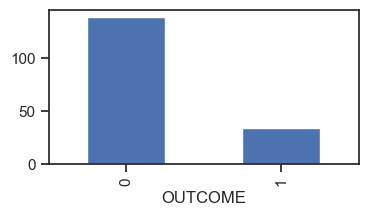

In [ ]:
df["OUTCOME"].value_counts().plot(kind="bar")

In [ ]:
df.isnull().sum()

SAMPLE                  0
NAME                    0
MEAL TIME               0
GLUCOMETER  READING     0
940(R)                  0
940(T)                  0
1050(R)                 0
1300(R)                 0
MALE                    0
FEMALE                  0
AGE                     0
OUTCOME                 0
dtype: int64

In [ ]:
df.duplicated().sum()


0

In [ ]:
df=df.drop(columns=["SAMPLE"])


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
bc = BaggingClassifier(n_estimators=150, random_state=2)


In [ ]:
bc.fit(X_train,y_train)


BaggingClassifier(n_estimators=150, random_state=2)

In [ ]:
y_pred=bc.predict(X_test)


In [ ]:
print(accuracy_score(y_test,y_pred))
print()
print(precision_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))

1.0

1.0

[[30  0]
 [ 0  5]]
